# Results analysis

This notebook analysis the results gathered from the experiments, which are stored in these files:

* results_by_track.csv
* \_models/*-gpt2-_*/all_results.json

In [2]:
# First I am going to manually define the results from the GPT-2 model



In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

In [4]:
results = pd.read_csv("../results_by_track.csv")
results.head()

,experiment,mse,rmse,mae,r2
0,danceability-xdg-100-probs-by_track,0.023679,0.153880,0.116560,0.383259
1,danceability-bayes-100-probs-by_track,0.025348,0.159212,0.124374,0.339778
2,danceability-baseline-100-probs-by_track,0.076357,0.276327,0.219899,-0.988784
3,acousticness-xdg-100-probs-by_track,0.066028,0.256959,0.184070,0.313688
4,acousticness-bayes-100-probs-by_track,0.068349,0.261436,0.200401,0.289565


In [5]:
# Create more columns based in the experiment type
results[['target', 'model', 'limit', 'input', 'dimension']] = results['experiment'].str.split('-', expand=True)
results.head()

,experiment,mse,rmse,mae,r2,target,model,limit,input,dimension
0,danceability-xdg-100-probs-by_track,0.023679,0.153880,0.116560,0.383259,danceability,xdg,100,probs,by_track
1,danceability-bayes-100-probs-by_track,0.025348,0.159212,0.124374,0.339778,danceability,bayes,100,probs,by_track
2,danceability-baseline-100-probs-by_track,0.076357,0.276327,0.219899,-0.988784,danceability,baseline,100,probs,by_track
3,acousticness-xdg-100-probs-by_track,0.066028,0.256959,0.184070,0.313688,acousticness,xdg,100,probs,by_track
4,acousticness-bayes-100-probs-by_track,0.068349,0.261436,0.200401,0.289565,acousticness,bayes,100,probs,by_track


In [6]:
# REMOVE the baseline data and leave it in a different dataset

# baseline = results.loc[results.model == "baseline"]
# results = results.loc[results.model != "baseline"]

In [6]:
# Add the GPT-2 results


# gpt_results_rmse = {
#     "danceability-gpt-duplicated": {
#         "experiment": "danceability-gpt-duplicated",
#         "mse": None,
#         "rmse": 0.157,
#         "mae": None,
#         "r2": None,
#         "target": "danceability",
#         "model": "gpt-2",
#         "limit": 256
#     }
# }

gpt_results_rmse = {
    "danceability": {
        "duplicated": 0.157,
        "ordered": 0.149,
        "count": 0.145
    },
    "acousticness": {
        "duplicated": 0.244,
        "ordered": 0.237,
        "count": 0.237
    },
    "energy": {
        "duplicated": 0.193,
        "ordered": 0.188,
        "count": 0.187
    },
    "energy": {
        "duplicated": 0.245,
        "ordered": 0.235,
        "count": 0.233
    },
    "instrumentalness": {
        "duplicated": 0.322,
        "ordered": 0.297,
        "count": 0.301
    }
}

rows = []
for target in gpt_results_rmse:
    rows += [
        [f"{target}-gpt2-tokens_from_repeat_tags", None, gpt_results_rmse[target]["duplicated"], None, None, target, "gpt2", 256, "tokens_from_repeat_tags", "by_track"],
        [f"{target}-gpt2-tokens_from_tag_order", None, gpt_results_rmse[target]["ordered"], None, None, target, "gpt2", 256, "tokens_from_tag_order", "by_track"],
        [f"{target}-gpt2-tokens_from_tag_weight", None, gpt_results_rmse[target]["count"], None, None, target, "gpt2", 256, "tokens_from_tag_weight", "by_track"],
    ]

results_with_gpt2 = pd.concat([
    results,
    pd.DataFrame(
        data=np.array(rows),
        columns=["experiment", "mse", "rmse", "mae","r2", "target", "model", "limit","input", "dimension"]
    )
], ignore_index=True)
results_with_gpt2.rmse = results_with_gpt2.rmse.astype(float)
results_with_gpt2.rmse

0      0.153880
1      0.159212
2      0.276327
3      0.256959
4      0.261436
         ...   
187    0.235000
188    0.233000
189    0.322000
190    0.297000
191    0.301000
Name: rmse, Length: 192, dtype: float64

In [7]:
# Define a function to group by dimensions and calculate MEAN and STD

def mean_std_by(data, dimension, value="rmse", second_dimension="model"):
    grouped_by = data[[value] + [dimension, second_dimension]].groupby([dimension, second_dimension])
    mean = grouped_by.mean().reset_index().pivot(index=second_dimension,columns=dimension, values=value)
    std = grouped_by.std().reset_index().pivot(index=second_dimension,columns=dimension, values=value)
    return mean, std

<Axes: xlabel='model'>

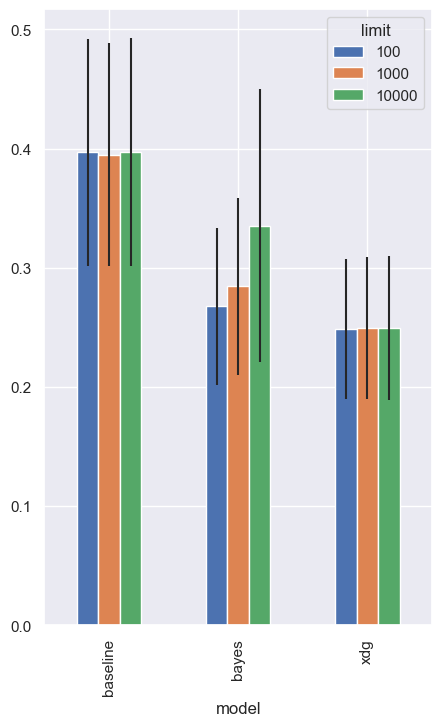

In [8]:
# Find the mean RMSE and std BY limit and model
mean_by_limit, std_by_limit = mean_std_by(results, "limit")
mean_by_limit.plot(figsize=(5,8), kind="bar", yerr=std_by_limit)

<Axes: xlabel='model'>

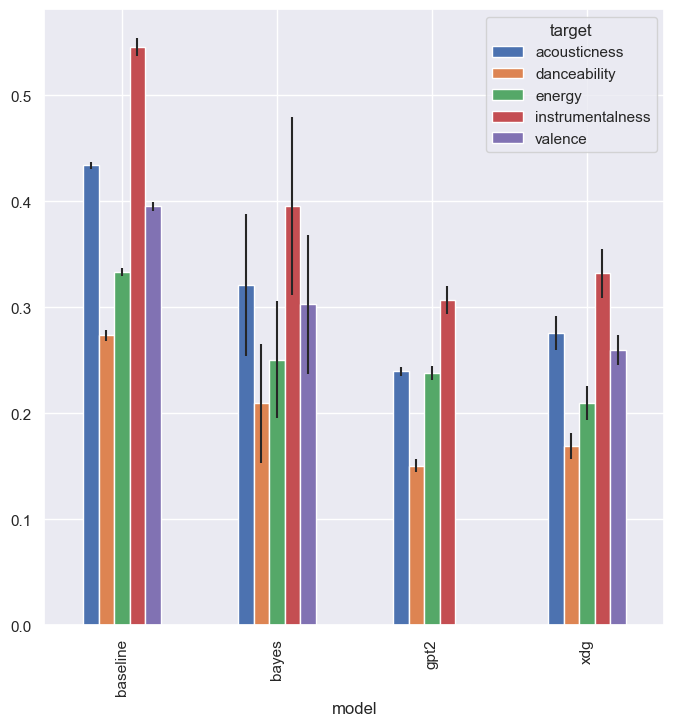

In [9]:
# Find the mean RMSE and std BY target
mean_by_target, std_by_target = mean_std_by(results_with_gpt2,"target")
mean_by_target.plot(figsize=(8,8), kind="bar", yerr=std_by_target)

input        probs  tokens_from_repeat_tags  tokens_from_tag_order  \
model                                                                
baseline  0.395485                 0.394926               0.396469   
bayes     0.228435                 0.347613               0.309317   
gpt2           NaN                 0.242000               0.229500   
xdg       0.223805                 0.252596               0.264563   

input     tokens_from_tag_weight  
model                             
baseline                0.397659  
bayes                   0.297403  
gpt2                    0.229000  
xdg                     0.255643  


<Axes: xlabel='model'>

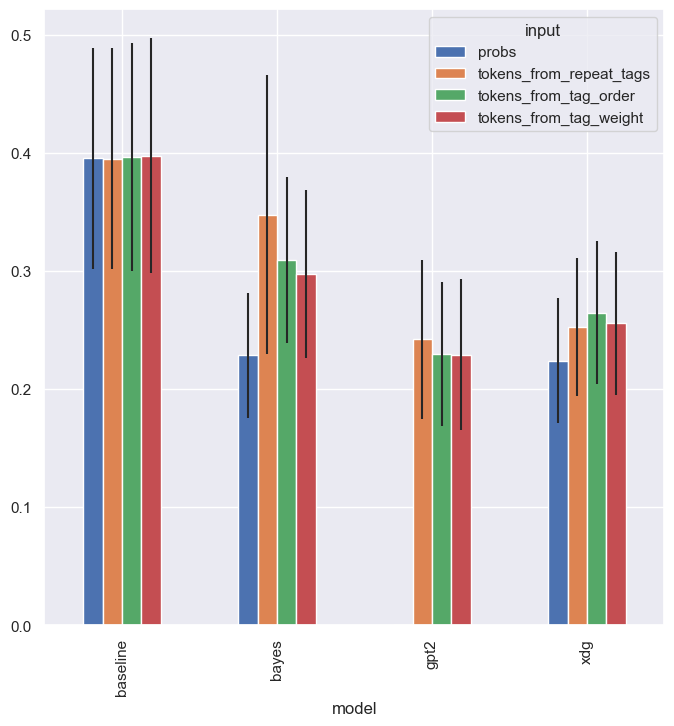

In [10]:
# Find the mean RMSE and std BY input
mean_by_input, std_by_input = mean_std_by(results_with_gpt2, "input")
print(mean_by_input)
mean_by_input.plot(figsize=(8,8), kind="bar", yerr=std_by_input)

<Axes: xlabel='target'>

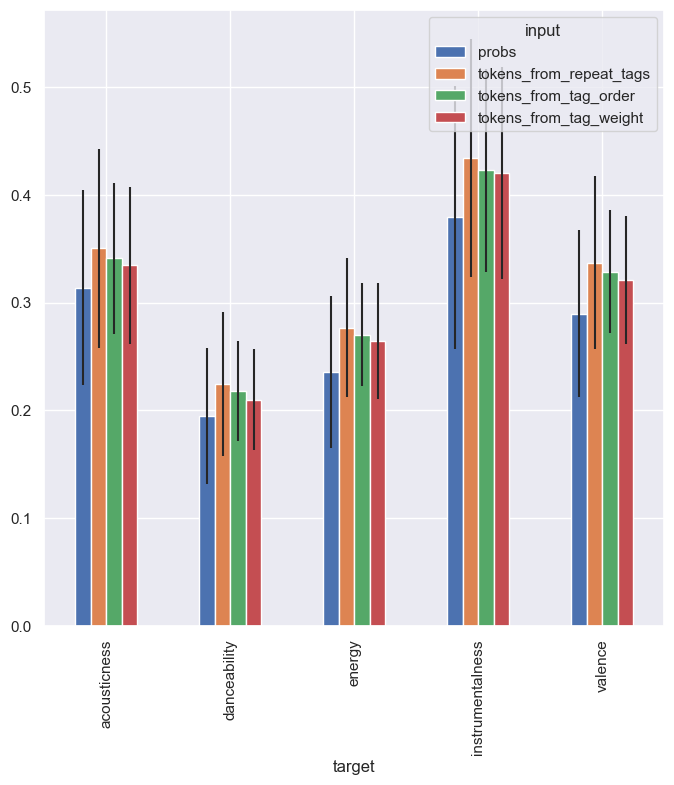

In [11]:
# Find the mean RMSE and std BY input type and target
mean, std = mean_std_by(results_with_gpt2, "input", second_dimension="target")
mean.plot(figsize=(8,8), kind="bar", yerr=std)

In [21]:
mean.transpose().mean()

target
acousticness        0.334937
danceability        0.211716
energy              0.261538
instrumentalness    0.414268
valence             0.319042
dtype: float64

In [22]:
std.transpose().mean()

target
acousticness        0.081536
danceability        0.055809
energy              0.059289
instrumentalness    0.106199
valence             0.068492
dtype: float64

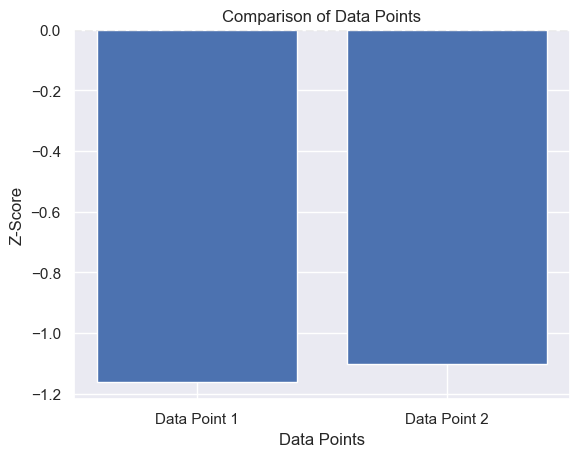

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Data
mean = 0.414
std_dev = 0.106
data_points = [0.291, 0.297]

# Calculate z-scores
z_scores = [(x - mean) / std_dev for x in data_points]

# Plotting
labels = ['Data Point 1', 'Data Point 2']
x = np.arange(len(labels))

fig, ax = plt.subplots()
ax.bar(x, z_scores)

ax.set_xlabel('Data Points')
ax.set_ylabel('Z-Score')
ax.set_title('Comparison of Data Points')
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.axhline(0, color='gray', linestyle='--')  # Add a horizontal line at z-score 0

plt.show()

